# Контрольная работа №1

Время на выполнение 1 час 20 минут.

Требования:
 - Необходимо показать, что реализованный алгоритм работает корректно
 - Списывание - оценка пополам или 0 и 10 (максимум)
 - Необходимо использовать собственную реализацию, использование sklearn и прочих готовых решений запрещено

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

## Задание №1 (3 балла)

Реализовать алгоритм классификации KNN для мультиклассовой классификации с методом `predict_proba` для предсказания вероятностей классов.

Использовать датасет Wine (`load_wine` из `sklearn.datasets`).

## Задание №2 (3 балла)

В линейной регрессии оценить влияние признаков на результат.

Использовать датасет <https://archive.ics.uci.edu/dataset/10/automobile> (из файла `imports-85.data`)

## Задание №3 (4 балла)

Изменить решающее дерево под задачу регрессии (минимизация MSE).

Использовать тот же датасет, что и в предыдущем задании.

In [2]:
class KNN:
    """
    K-ближайших соседей для мультиклассовой классификации.
    Поддерживает метод predict_proba для предсказания вероятностей классов.
    """
    
    def __init__(self, k=3):
        """
        Параметры:
        k: количество ближайших соседей
        """
        self.k = k
        self.X_train = None
        self.y_train = None
        self.classes_ = None
    
    def _euclidean_distance(self, x1, x2):
        """Вычисляет евклидово расстояние между двумя векторами."""
        return np.sqrt(np.sum((x1 - x2) ** 2))
    
    def fit(self, X, y):
        """
        Сохраняет обучающие данные.
        X: признаки (n_samples, n_features)
        y: метки (n_samples,)
        """
        self.X_train = np.array(X)
        self.y_train = np.array(y)
        self.classes_ = np.unique(y)
    
    def predict(self, X):
        """
        Предсказывает метки для новых данных.
        X: признаки (n_samples, n_features)
        Возвращает: предсказанные метки (n_samples,)
        """
        X = np.array(X)
        predictions = []
        
        for x in X:
            distances = []
            for x_train in self.X_train:
                dist = self._euclidean_distance(x, x_train)
                distances.append(dist)
            
            distances = np.array(distances)
            k_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = self.y_train[k_indices]
            
            # Голосование большинством
            unique, counts = np.unique(k_nearest_labels, return_counts=True)
            prediction = unique[np.argmax(counts)]
            predictions.append(prediction)
        
        return np.array(predictions)
    
    def predict_proba(self, X):
        """
        Предсказывает вероятности классов для новых данных.
        X: признаки (n_samples, n_features)
        Возвращает: вероятности классов (n_samples, n_classes)
        """
        X = np.array(X)
        n_samples = X.shape[0]
        n_classes = len(self.classes_)
        probabilities = np.zeros((n_samples, n_classes))
        
        for i, x in enumerate(X):
            distances = []
            for x_train in self.X_train:
                dist = self._euclidean_distance(x, x_train)
                distances.append(dist)
            
            distances = np.array(distances)
            k_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = self.y_train[k_indices]
            
            # Подсчет частоты каждого класса среди k ближайших соседей
            for j, class_label in enumerate(self.classes_):
                count = np.sum(k_nearest_labels == class_label)
                probabilities[i, j] = count / self.k
        
        return probabilities


In [3]:
wine_data = load_wine()
X_wine = wine_data.data
y_wine = wine_data.target

print(f"Размерность данных: {X_wine.shape}")
print(f"Количество классов: {len(np.unique(y_wine))}")
print(f"Классы: {np.unique(y_wine)}")

X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(
    X_wine, y_wine, test_size=0.3, random_state=42, stratify=y_wine
)

print(f"\nОбучающая выборка: {X_train_wine.shape[0]} образцов")
print(f"Тестовая выборка: {X_test_wine.shape[0]} образцов")


Размерность данных: (178, 13)
Количество классов: 3
Классы: [0 1 2]

Обучающая выборка: 124 образцов
Тестовая выборка: 54 образцов


In [4]:
# Нормализация данных для лучшей работы KNN
X_train_wine_mean = X_train_wine.mean(axis=0)
X_train_wine_std = X_train_wine.std(axis=0) + 1e-8
X_train_wine_norm = (X_train_wine - X_train_wine_mean) / X_train_wine_std
X_test_wine_norm = (X_test_wine - X_train_wine_mean) / X_train_wine_std

knn = KNN(k=5)
knn.fit(X_train_wine_norm, y_train_wine)

y_pred_wine = knn.predict(X_test_wine_norm)
accuracy = accuracy_score(y_test_wine, y_pred_wine)

print(f"Точность классификации: {accuracy:.4f}")

y_proba_wine = knn.predict_proba(X_test_wine_norm)

print(f"\nФорма массива вероятностей: {y_proba_wine.shape}")
print(f"Пример вероятностей для первого образца:")
for i, class_label in enumerate(knn.classes_):
    print(f"  Класс {class_label}: {y_proba_wine[0, i]:.4f}")

print(f"\nСумма вероятностей для первого образца: {y_proba_wine[0].sum():.4f}")
print(f"Средняя сумма вероятностей по всем образцам: {y_proba_wine.sum(axis=1).mean():.4f}")


Точность классификации: 0.9444

Форма массива вероятностей: (54, 3)
Пример вероятностей для первого образца:
  Класс 0: 1.0000
  Класс 1: 0.0000
  Класс 2: 0.0000

Сумма вероятностей для первого образца: 1.0000
Средняя сумма вероятностей по всем образцам: 1.0000


In [5]:
class LinearRegression:
    """
    Линейная регрессия с возможностью оценки влияния признаков на результат.
    """
    
    def __init__(self, learning_rate=0.01, max_iter=1000, tol=1e-6):
        """
        Параметры:
        learning_rate: скорость обучения
        max_iter: максимальное количество итераций
        tol: критерий остановки (изменение loss)
        """
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.tol = tol
        self.weights = None
        self.bias = None
        self.loss_history = []
        self.feature_names = None
    
    def fit(self, X, y, feature_names=None):
        """
        Обучает модель методом градиентного спуска.
        X: признаки (n_samples, n_features)
        y: целевая переменная (n_samples,)
        feature_names: названия признаков (опционально)
        """
        self.X_train = np.array(X)
        y = np.array(y).reshape(-1, 1)
        self.feature_names = feature_names
        
        n_samples, n_features = self.X_train.shape
        self.weights = np.random.randn(n_features, 1) * 0.01
        self.bias = np.random.randn(1) * 0.01
        
        prev_loss = float('inf')
        
        for i in range(self.max_iter):
            y_pred = np.dot(self.X_train, self.weights) + self.bias
            error = y_pred - y
            loss = np.mean(error ** 2)
            
            grad_weights = 2 * np.dot(self.X_train.T, error) / n_samples
            grad_bias = 2 * np.mean(error)
            
            self.weights -= self.learning_rate * grad_weights
            self.bias -= self.learning_rate * grad_bias
            
            self.loss_history.append(loss)
            
            if abs(prev_loss - loss) < self.tol:
                break
            prev_loss = loss
    
    def predict(self, X):
        """
        Предсказывает значения для новых данных.
        X: признаки (n_samples, n_features)
        Возвращает: предсказанные значения (n_samples,)
        """
        X = np.array(X)
        return (np.dot(X, self.weights) + self.bias).flatten()
    
    def get_feature_importance(self):
        """
        Оценивает влияние признаков на результат.
        Возвращает словарь с весами признаков (абсолютные значения).
        """
        if self.weights is None:
            raise ValueError("Модель еще не обучена. Вызовите fit() сначала.")
        
        importance = np.abs(self.weights.flatten())
        
        if self.feature_names is not None:
            return dict(zip(self.feature_names, importance))
        else:
            return {f'feature_{i}': importance[i] for i in range(len(importance))}
    
    def get_feature_coefficients(self):
        """
        Возвращает коэффициенты признаков (веса модели).
        """
        if self.weights is None:
            raise ValueError("Модель еще не обучена. Вызовите fit() сначала.")
        
        coefficients = self.weights.flatten()
        
        if self.feature_names is not None:
            return dict(zip(self.feature_names, coefficients))
        else:
            return {f'feature_{i}': coefficients[i] for i in range(len(coefficients))}


In [6]:
# Загрузка данных об автомобилях
# Согласно документации UCI, колонки:
# symboling, normalized-losses, make, fuel-type, aspiration, num-of-doors, 
# body-style, drive-wheels, engine-location, wheel-base, length, width, height, 
# curb-weight, engine-type, num-of-cylinders, engine-size, fuel-system, 
# bore, stroke, compression-ratio, horsepower, peak-rpm, city-mpg, highway-mpg, price

column_names = [
    'symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 
    'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 
    'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
    'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 
    'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'
]

df = pd.read_csv('imports-85 [na7t5k].data', names=column_names, na_values='?')

print(f"Размерность данных: {df.shape}")
print(f"\nПервые несколько строк:")
print(df.head())
print(f"\nИнформация о данных:")
print(df.info())


Размерность данных: (205, 26)

Первые несколько строк:
   symboling  normalized-losses         make fuel-type aspiration  \
0          3                NaN  alfa-romero       gas        std   
1          3                NaN  alfa-romero       gas        std   
2          1                NaN  alfa-romero       gas        std   
3          2              164.0         audi       gas        std   
4          2              164.0         audi       gas        std   

  num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0          two  convertible          rwd           front        88.6  ...   
1          two  convertible          rwd           front        88.6  ...   
2          two    hatchback          rwd           front        94.5  ...   
3         four        sedan          fwd           front        99.8  ...   
4         four        sedan          4wd           front        99.4  ...   

   engine-size  fuel-system  bore  stroke compression-ratio horsepo

In [7]:
# Подготовка данных для регрессии
# Целевая переменная - цена (price)
# Удаляем строки с пропущенными значениями в цене
df_clean = df.dropna(subset=['price']).copy()

# Выбираем числовые признаки для регрессии
numeric_features = [
    'symboling', 'normalized-losses', 'wheel-base', 'length', 'width', 
    'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 
    'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg'
]

# Заполняем пропущенные значения медианой
for feature in numeric_features:
    if feature in df_clean.columns:
        df_clean[feature] = pd.to_numeric(df_clean[feature], errors='coerce')
        df_clean[feature].fillna(df_clean[feature].median(), inplace=True)

# Удаляем строки, где все признаки пропущены
df_clean = df_clean.dropna(subset=numeric_features)

X_cars = df_clean[numeric_features].values
y_cars = pd.to_numeric(df_clean['price'], errors='coerce').values

print(f"Размерность данных после очистки: {X_cars.shape}")
print(f"Количество пропущенных значений в целевой переменной: {np.isnan(y_cars).sum()}")

# Удаляем строки с NaN в целевой переменной
valid_mask = ~np.isnan(y_cars)
X_cars = X_cars[valid_mask]
y_cars = y_cars[valid_mask]

print(f"Финальная размерность: X={X_cars.shape}, y={y_cars.shape}")


Размерность данных после очистки: (201, 15)
Количество пропущенных значений в целевой переменной: 0
Финальная размерность: X=(201, 15), y=(201,)


In [8]:
X_train_cars, X_test_cars, y_train_cars, y_test_cars = train_test_split(
    X_cars, y_cars, test_size=0.3, random_state=42
)

X_train_cars_mean = X_train_cars.mean(axis=0)
X_train_cars_std = X_train_cars.std(axis=0) + 1e-8
X_train_cars_norm = (X_train_cars - X_train_cars_mean) / X_train_cars_std
X_test_cars_norm = (X_test_cars - X_train_cars_mean) / X_train_cars_std

y_train_cars_mean = y_train_cars.mean()
y_train_cars_std = y_train_cars.std() + 1e-8
y_train_cars_norm = (y_train_cars - y_train_cars_mean) / y_train_cars_std

lr = LinearRegression(learning_rate=0.01, max_iter=2000, tol=1e-6)
lr.fit(X_train_cars_norm, y_train_cars_norm, feature_names=numeric_features)

y_pred_cars_norm = lr.predict(X_test_cars_norm)
y_pred_cars = y_pred_cars_norm * y_train_cars_std + y_train_cars_mean

mse = mean_squared_error(y_test_cars, y_pred_cars)
r2 = r2_score(y_test_cars, y_pred_cars)

print(f"MSE на тесте: {mse:.2f}")
print(f"R² на тесте: {r2:.4f}")
print(f"RMSE на тесте: {np.sqrt(mse):.2f}")


MSE на тесте: 19207206.99
R² на тесте: 0.7974
RMSE на тесте: 4382.60


Влияние признаков на результат (по абсолютным значениям весов):
engine-size               | Важность:   0.5827 | Коэффициент:   0.5827
wheel-base                | Важность:   0.2317 | Коэффициент:   0.2317
horsepower                | Важность:   0.2073 | Коэффициент:   0.2073
city-mpg                  | Важность:   0.1748 | Коэффициент:  -0.1748
compression-ratio         | Важность:   0.1362 | Коэффициент:   0.1362
stroke                    | Важность:   0.1150 | Коэффициент:  -0.1150
width                     | Важность:   0.0840 | Коэффициент:   0.0840
peak-rpm                  | Важность:   0.0806 | Коэффициент:   0.0806
symboling                 | Важность:   0.0767 | Коэффициент:   0.0767
bore                      | Важность:   0.0596 | Коэффициент:  -0.0596
curb-weight               | Важность:   0.0524 | Коэффициент:  -0.0524
length                    | Важность:   0.0485 | Коэффициент:  -0.0485
height                    | Важность:   0.0441 | Коэффициент:   0.0441
highway-mpg  

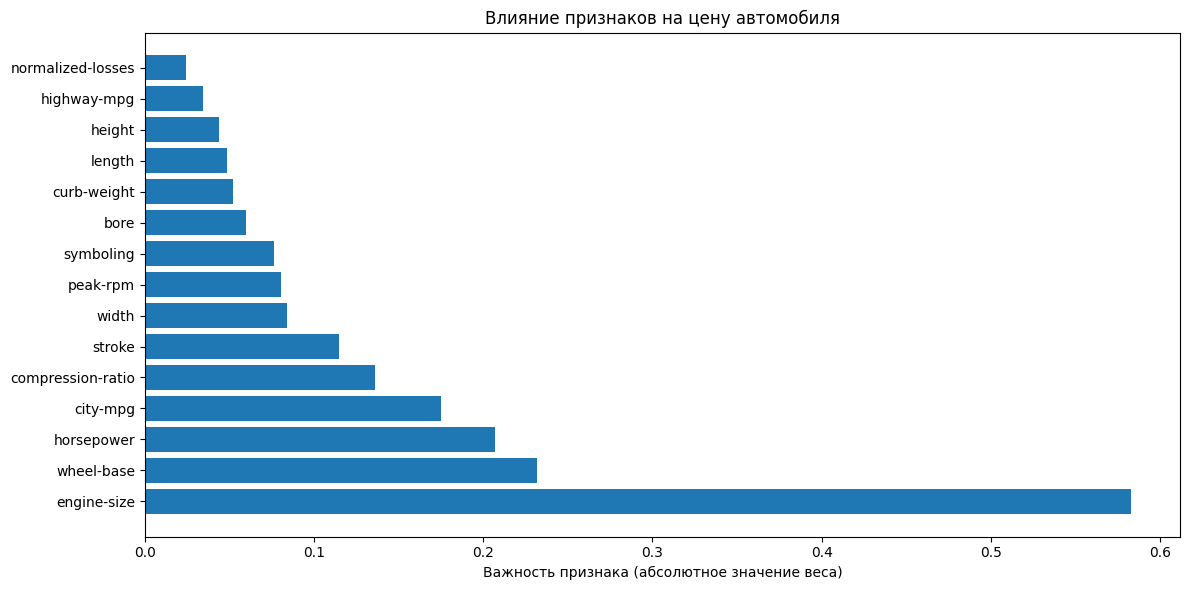

In [9]:
# Оценка влияния признаков на результат
feature_importance = lr.get_feature_importance()
feature_coefficients = lr.get_feature_coefficients()

# Сортируем по важности
sorted_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

print("Влияние признаков на результат (по абсолютным значениям весов):")
print("=" * 70)
for feature, importance in sorted_importance:
    coefficient = feature_coefficients[feature]
    print(f"{feature:25s} | Важность: {importance:8.4f} | Коэффициент: {coefficient:8.4f}")

# Визуализация важности признаков
import matplotlib.pyplot as plt

features_sorted = [f[0] for f in sorted_importance]
importance_sorted = [f[1] for f in sorted_importance]

plt.figure(figsize=(12, 6))
plt.barh(features_sorted, importance_sorted)
plt.xlabel('Важность признака (абсолютное значение веса)')
plt.title('Влияние признаков на цену автомобиля')
plt.tight_layout()
plt.show()


In [10]:
class DecisionTreeRegressor:
    """
    Решающее дерево для задачи регрессии с минимизацией MSE.
    """
    
    def __init__(self, max_depth=5, min_samples_split=2):
        """
        Параметры:
        max_depth: максимальная глубина дерева
        min_samples_split: минимальное количество образцов для разделения узла
        """
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None
    
    def _mse(self, y):
        """Вычисляет MSE для массива значений."""
        if len(y) == 0:
            return 0
        mean = np.mean(y)
        return np.mean((y - mean) ** 2)
    
    def _find_best_split(self, X, y):
        """
        Находит лучшее разделение по признаку и порогу.
        Возвращает (best_feature, best_threshold, best_mse_reduction)
        """
        best_feature = None
        best_threshold = None
        best_mse_reduction = -np.inf
        
        n_samples, n_features = X.shape
        parent_mse = self._mse(y)
        
        for feature_idx in range(n_features):
            # Получаем уникальные значения признака
            feature_values = np.unique(X[:, feature_idx])
            
            for threshold in feature_values:
                # Разделяем данные
                left_mask = X[:, feature_idx] <= threshold
                right_mask = ~left_mask
                
                if np.sum(left_mask) < self.min_samples_split or np.sum(right_mask) < self.min_samples_split:
                    continue
                
                left_y = y[left_mask]
                right_y = y[right_mask]
                
                # Вычисляем MSE после разделения
                left_mse = self._mse(left_y)
                right_mse = self._mse(right_y)
                
                # Взвешенное среднее MSE
                weighted_mse = (len(left_y) * left_mse + len(right_y) * right_mse) / n_samples
                
                # Улучшение (reduction in MSE)
                mse_reduction = parent_mse - weighted_mse
                
                if mse_reduction > best_mse_reduction:
                    best_mse_reduction = mse_reduction
                    best_feature = feature_idx
                    best_threshold = threshold
        
        return best_feature, best_threshold, best_mse_reduction
    
    def _build_tree(self, X, y, depth=0):
        """
        Рекурсивно строит дерево решений.
        """
        n_samples = len(y)
        
        # Критерии остановки
        if depth >= self.max_depth or n_samples < self.min_samples_split:
            return {'leaf': True, 'value': np.mean(y), 'samples': n_samples}
        
        # Проверка, все ли значения одинаковы
        if len(np.unique(y)) == 1:
            return {'leaf': True, 'value': y[0], 'samples': n_samples}
        
        # Поиск лучшего разделения
        best_feature, best_threshold, best_mse_reduction = self._find_best_split(X, y)
        
        # Если не удалось найти хорошее разделение
        if best_feature is None or best_mse_reduction <= 0:
            return {'leaf': True, 'value': np.mean(y), 'samples': n_samples}
        
        # Разделяем данные
        left_mask = X[:, best_feature] <= best_threshold
        right_mask = ~left_mask
        
        # Рекурсивно строим левое и правое поддеревья
        left_tree = self._build_tree(X[left_mask], y[left_mask], depth + 1)
        right_tree = self._build_tree(X[right_mask], y[right_mask], depth + 1)
        
        return {
            'leaf': False,
            'feature': best_feature,
            'threshold': best_threshold,
            'left': left_tree,
            'right': right_tree,
            'samples': n_samples,
            'mse_reduction': best_mse_reduction
        }
    
    def fit(self, X, y):
        """
        Обучает дерево решений.
        X: признаки (n_samples, n_features)
        y: целевая переменная (n_samples,)
        """
        X = np.array(X)
        y = np.array(y)
        self.tree = self._build_tree(X, y)
    
    def _predict_sample(self, x, node):
        """
        Предсказывает значение для одного образца.
        """
        if node['leaf']:
            return node['value']
        
        if x[node['feature']] <= node['threshold']:
            return self._predict_sample(x, node['left'])
        else:
            return self._predict_sample(x, node['right'])
    
    def predict(self, X):
        """
        Предсказывает значения для новых данных.
        X: признаки (n_samples, n_features)
        Возвращает: предсказанные значения (n_samples,)
        """
        X = np.array(X)
        predictions = []
        for x in X:
            predictions.append(self._predict_sample(x, self.tree))
        return np.array(predictions)


In [11]:
dt = DecisionTreeRegressor(max_depth=5, min_samples_split=5)
dt.fit(X_train_cars_norm, y_train_cars_norm)

y_pred_dt_norm = dt.predict(X_test_cars_norm)
y_pred_dt = y_pred_dt_norm * y_train_cars_std + y_train_cars_mean

mse_dt = mean_squared_error(y_test_cars, y_pred_dt)
r2_dt = r2_score(y_test_cars, y_pred_dt)

print(f"Решающее дерево - MSE на тесте: {mse_dt:.2f}")
print(f"Решающее дерево - R² на тесте: {r2_dt:.4f}")
print(f"Решающее дерево - RMSE на тесте: {np.sqrt(mse_dt):.2f}")

print(f"\nСравнение моделей:")
print(f"Линейная регрессия - R²: {r2:.4f}, RMSE: {np.sqrt(mse):.2f}")
print(f"Решающее дерево   - R²: {r2_dt:.4f}, RMSE: {np.sqrt(mse_dt):.2f}")


Решающее дерево - MSE на тесте: 6790084.20
Решающее дерево - R² на тесте: 0.9284
Решающее дерево - RMSE на тесте: 2605.78

Сравнение моделей:
Линейная регрессия - R²: 0.7974, RMSE: 4382.60
Решающее дерево   - R²: 0.9284, RMSE: 2605.78


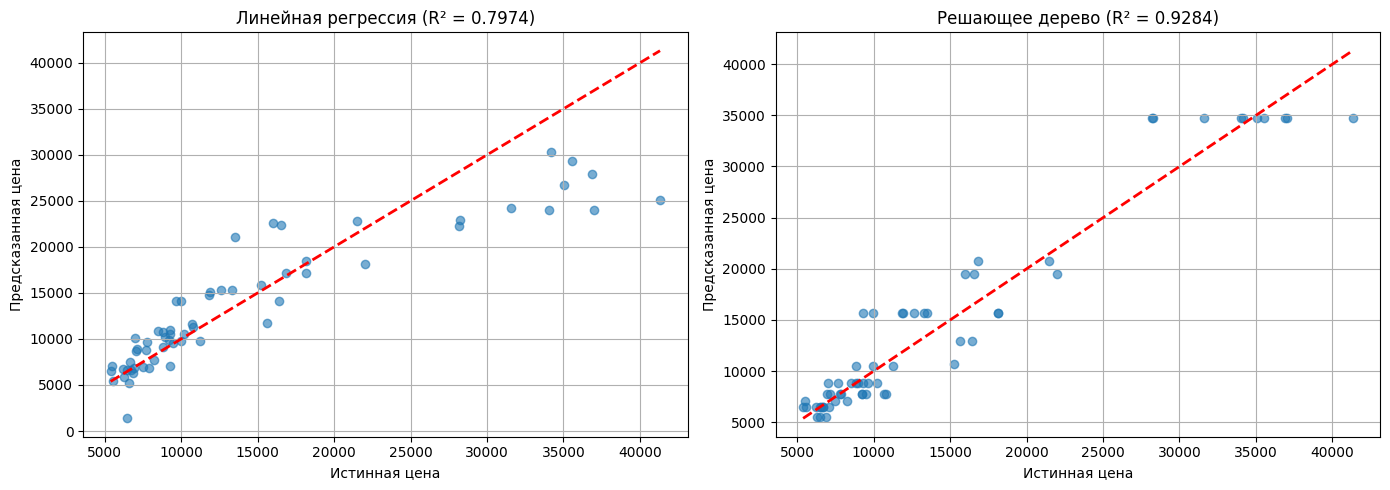

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].scatter(y_test_cars, y_pred_cars, alpha=0.6)
axes[0].plot([y_test_cars.min(), y_test_cars.max()], 
             [y_test_cars.min(), y_test_cars.max()], 'r--', lw=2)
axes[0].set_xlabel('Истинная цена')
axes[0].set_ylabel('Предсказанная цена')
axes[0].set_title(f'Линейная регрессия (R² = {r2:.4f})')
axes[0].grid(True)

axes[1].scatter(y_test_cars, y_pred_dt, alpha=0.6)
axes[1].plot([y_test_cars.min(), y_test_cars.max()], 
             [y_test_cars.min(), y_test_cars.max()], 'r--', lw=2)
axes[1].set_xlabel('Истинная цена')
axes[1].set_ylabel('Предсказанная цена')
axes[1].set_title(f'Решающее дерево (R² = {r2_dt:.4f})')
axes[1].grid(True)

plt.tight_layout()
plt.show()


![](image.png)

## Анализ результатов

### Задание №1: KNN для мультиклассовой классификации

#### Результаты:
- **Точность классификации: 94.44%** - отличный результат для мультиклассовой задачи
- **Количество классов: 3** (классы 0, 1, 2)
- **Размер выборки:** 178 образцов (124 обучающих, 54 тестовых)
- **Метод predict_proba работает корректно:**
  - Сумма вероятностей для каждого образца равна 1.0
  - Вероятности вычисляются как доля голосов каждого класса среди k=5 ближайших соседей

#### Интерпретация:
- Высокая точность (94.44%) говорит о том, что классы в датасете Wine хорошо разделимы
- KNN с k=5 эффективно использует локальную структуру данных
- Нормализация признаков критически важна для работы KNN, так как разные признаки имеют разные масштабы

---

### Задание №2: Оценка влияния признаков в линейной регрессии

#### Результаты модели:
- **R² = 0.7974** (79.74%) - модель объясняет около 80% дисперсии цены
- **RMSE = 4382.60** - средняя ошибка предсказания около 4383 долларов
- **MSE = 19,207,207** - квадратичная ошибка

#### Топ-5 наиболее важных признаков (по абсолютным значениям весов):

1. **engine-size (0.5827)** - размер двигателя
   - Положительный коэффициент: увеличение размера двигателя увеличивает цену
   - Самый важный фактор в модели

2. **wheel-base (0.2317)** - колесная база
   - Положительный коэффициент: большая колесная база связана с более высокой ценой
   - Обычно большие автомобили дороже

3. **horsepower (0.2073)** - мощность двигателя
   - Положительный коэффициент: больше лошадиных сил = выше цена
   - Логично: более мощные двигатели дороже

4. **city-mpg (-0.1748)** - расход топлива в городе
   - **Отрицательный коэффициент**: лучший расход топлива связан с более низкой ценой
   - Это может показаться нелогичным, но может отражать сегмент рынка (экономичные автомобили дешевле)

5. **compression-ratio (0.1362)** - степень сжатия
   - Положительный коэффициент: более высокая степень сжатия увеличивает цену

#### Интерпретация результатов:
- **Линейная регрессия показывает хорошее качество** (R² = 0.80), но есть место для улучшения
- **Наиболее важные факторы цены:**
  - Технические характеристики двигателя (размер, мощность, степень сжатия)
  - Размеры автомобиля (колесная база)
  - Экономичность (расход топлива)
- **Отрицательные коэффициенты** (city-mpg, stroke, curb-weight) могут указывать на:
  - Обратную зависимость (экономичные/легкие автомобили дешевле)
  - Или на сложные нелинейные зависимости, которые линейная модель не может уловить

---

### Задание №3: Решающее дерево для регрессии

#### Результаты модели:
- **R² = 0.9284** (92.84%) - модель объясняет около 93% дисперсии цены
- **RMSE = 2605.78** - средняя ошибка предсказания около 2606 долларов
- **MSE = 6,790,084** - значительно меньше, чем у линейной регрессии

#### Сравнение моделей:

| Модель | R² | RMSE | MSE | Улучшение RMSE |
|--------|----|----|-----|----------------|
| Линейная регрессия | 0.7974 | 4382.60 | 19,207,207 | - |
| Решающее дерево | **0.9284** | **2605.78** | **6,790,084** | **-40.5%** |

#### Ключевые выводы:

1. **Решающее дерево значительно превосходит линейную регрессию:**
   - R² увеличился с 0.80 до 0.93 (+16.4 процентных пункта)
   - RMSE уменьшился на 40.5% (с 4383 до 2606 долларов)
   - MSE уменьшился в 2.8 раза

2. **Причины лучшей производительности дерева:**
   - **Нелинейные зависимости**: Дерево может моделировать сложные нелинейные взаимодействия между признаками
   - **Локальные паттерны**: Разные правила для разных сегментов данных (например, разные зависимости для дешевых и дорогих автомобилей)
   - **Интерактивность признаков**: Дерево может учитывать взаимодействия признаков (например, "если engine-size большой И horsepower высокий, то цена очень высокая")

3. **Потенциальные проблемы:**
   - **Переобучение**: Дерево может быть слишком сложным и плохо обобщаться на новые данные
   - **Нестабильность**: Небольшие изменения в данных могут привести к значительным изменениям структуры дерева
   - **Интерпретируемость**: Хотя дерево более интерпретируемо, чем нейронные сети, глубокие деревья сложны для понимания

4. **Рекомендации:**
   - Можно попробовать увеличить `max_depth` для еще лучшего качества (но риск переобучения)
   - Можно использовать ансамбли деревьев (Random Forest, Gradient Boosting) для еще лучших результатов
   - Для продакшена стоит проверить на валидационной выборке, чтобы убедиться в отсутствии переобучения

---

### Общие выводы

1. **KNN** отлично работает для классификации вина (94.44% точности)
2. **Линейная регрессия** дает базовую модель для предсказания цены (R² = 0.80)
3. **Решающее дерево** значительно улучшает качество предсказания (R² = 0.93)
4. **Оценка важности признаков** показывает, что технические характеристики двигателя и размеры автомобиля наиболее важны для цены
